Importa o modelo a ser fatiado e mapeado

In [25]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
First arg: /home/matheus/TangranV2/input/stl_models/Lingote9035.stl
Second arg: 300.0
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/input/sliced
Script executed from: /home/matheus/TangranV2
Script executed from: /home/matheus/TangranV2/slicing-with-images
number of degenerated triangles = 0
eps = 0.004
max thickness = 2
rounded plane spacing spacing = 2
model zmin = -7.752, model zmax = 15, first plane Z = -9.748, number of planes = 14
-Incremental, Lingote9035.stl, thickness = 2, #T = 432, #P = 12, #S = 384, 6.8e-05s (slicing), 0.000217s (polygon assembling), 0.001836s (total), *K: 0.888889


/bin/bash: /home/matheus/anaconda3/lib/python3.11/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
rm: cannot remove '*.svg': No such file or directory
rm: cannot remove '*.png': No such file or directory




writing image: ../input/sliced/layer_000.pgm


writing image: ../input/sliced/layer_001.pgm


writing image: ../input/sliced/layer_002.pgm


writing image: ../input/sliced/layer_003.pgm


writing image: ../input/sliced/layer_004.pgm


writing image: ../input/sliced/layer_005.pgm


writing image: ../input/sliced/layer_006.pgm


writing image: ../input/sliced/layer_007.pgm


writing image: ../input/sliced/layer_008.pgm


writing image: ../input/sliced/layer_009.pgm


writing image: ../input/sliced/layer_010.pgm


writing image: ../input/sliced/layer_011.pgm


writing output file: out_3d.svg
... done


Total de [criando as camadas] : 0.5265350341796875
salvando as camadas
Total de [salvando as camadas] : 0.1937847137451172
Total de [Fase 0: ] : 0.7207655906677246


Paredes Finas

In [26]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
#[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
configuracoes = files.Config("solda_config.yaml")
[d_tw, sob_tw_per, name_prog] = gui.ask_parameters_thin_walls(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        #c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        c.make_thin_walls(folders, d_tw, sob_tw_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
Total de [Criando paredes finas] : 0.9582390785217285
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0010383129119873047
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.01215505599975586
Total de [Fase 1: Camada: 0] : 0.9780528545379639
Fase 1: Camada: 1
Criando paredes finas
Total de [Criando paredes finas] : 0.8930830955505371
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0005409717559814453
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.009184598922729492
Total de [Fase 1: Camada: 1] : 0.9072394371032715
Fase 1: Camada: 2
Criando paredes finas
Total de [Criando paredes finas] : 0.7964839935302734
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0019643306732177734
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.013224601745605469
Total de [Fase 1: Camada: 2] : 0.8

Contornos

In [27]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[void_max,external_max,internal_max,d_cont,sob_cont_per,name_prog] = gui.ask_parameters_offsets(configuracoes)
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max, d_cont, sob_cont_per, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 5
Total de [Criando Lvls] : 0.41259264945983887
Criando os loops
Total de [Criando os loops] : 0.16479992866516113
Criando regiões de influência
Total de [Criando regiões de influência] : 0.005997180938720703
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 0.04002785682678223
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:0Bw -> bloqueado por limite maximo
['Lvl_003', 0, 0] Perdendo total:0Bw -> bloqueado por limite maximo
['Lvl_004', 0, 0] Perdendo total:0Bw -> bloqueado por limite maximo
Total de [Retirando regiões da camada] : 0.0330502986907959
Reunindo todos os loops em uma unica imagem
Total de [Reunindo todos os loops em uma unica imagem] : 0.0073986053466796875
salvando imagens das regiões
deletado: /L_000/I_000/offsets
Total de [salvando imagens das regiões] : 0.

Pontes

In [1]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np
from components import images_tools as it

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[n_max, d_bridg, sob_bridg_per, name_prog] = gui.ask_parameters_bridges(configuracoes)
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        if i%2 == 1:
            last_image = it.rotate_img_cw(last_prohibited_areas )
        elif i%2 == 0:
            last_image = it.rotate_img_ccw(last_prohibited_areas )
        if i >= 2:
            if i%2 == 1:
                second_last_image = it.rotate_img_cw(camadas[i - 1].prohibited_areas)
            elif i%2 == 0:
                second_last_image = it.rotate_img_ccw(camadas[i - 1].prohibited_areas)
        else:
            second_last_image = np.zeros_like(last_image)
        c.prohibited_areas = last_image
        sum_prohibited_areas = it.sum_imgs([last_image, second_last_image])
        last_prohibited_areas = c.make_bridges(folders, n_max, d_bridg, sob_bridg_per, len(camadas), sum_prohibited_areas, name_prog)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
%reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.1036231517791748
Criando pontes de Zigzag
Value(False)
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 26.187238931655884
Criando pontes de Crossover
Total de [Criando pontes de Crossover] : 0.0014698505401611328
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.008709192276000977
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 1.3828277587890625e-05
salvando imagens das regiões
deletado: /L_000/I_000/bridges
Total de [salvando imagens das regiões] : 0.044541120529174805
Total de [Fase 3: Camada: 0] : 26.38468098640442
Fase 3: Camada: 1
Criando pontes de Offset
Total de [Criando pontes de Offset] : 0.04709482192993164
Criando pontes de Zigzag
teste: caso de uma unica linha no entorno da origem
Fechou uma ponte OK
Total de [Criando pontes de Zigzag] : 3.105783700942993
Criando pontes de Crossover
Total de [Criand

Zigzags

In [2]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
configuracoes = files.Config("solda_config.yaml")
[d_larg, sob_larg_per, name_prog] = gui.ask_parameters_zigzags(configuracoes)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders, d_larg, sob_larg_per, name_prog)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.3334615230560303
salvando imagens das regiões
deletado: /L_000/I_000/zigzags
Total de [salvando imagens das regiões] : 0.010262489318847656
Total de [Fase 4: Camada: 0] : 0.3816556930541992
Fase 4: Camada: 1
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.5913252830505371
salvando imagens das regiões
deletado: /L_001/I_000/zigzags
Total de [salvando imagens das regiões] : 0.008003473281860352
Total de [Fase 4: Camada: 1] : 0.6296210289001465
Fase 4: Camada: 2
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.2788240909576416
salvando imagens das regiões
deletado: /L_002/I_000/zigzags
Total de [salvando imagens das regiões] : 0.007338762283325195
Total de [Fase 4: Camada: 2] : 0.3149912357330322
Fase 4: Camada: 3
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 0.5471649169921875
salvando imagens das regiões
deletado: /L

IMAGEM DO MAPEAMENTO

Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 0.13075542449951172
Fase 4: Camada: 1


Total de [Fase 4: Camada: 1] : 0.0925898551940918
Fase 4: Camada: 2


Total de [Fase 4: Camada: 2] : 0.09633779525756836
Fase 4: Camada: 3


Total de [Fase 4: Camada: 3] : 0.09105587005615234
Fase 4: Camada: 4


Total de [Fase 4: Camada: 4] : 0.09767889976501465
Fase 4: Camada: 5


Total de [Fase 4: Camada: 5] : 0.09146380424499512
Fase 4: Camada: 6


Total de [Fase 4: Camada: 6] : 0.09987068176269531
Fase 4: Camada: 7


Total de [Fase 4: Camada: 7] : 0.10219287872314453


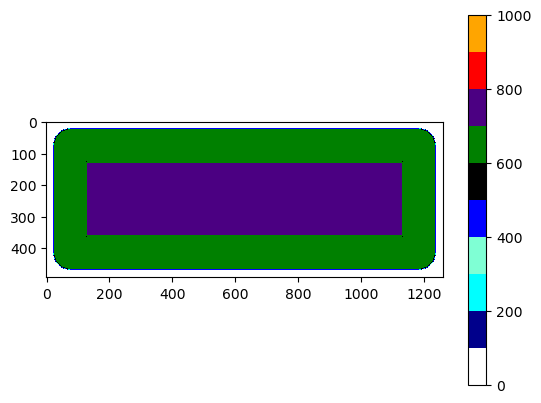

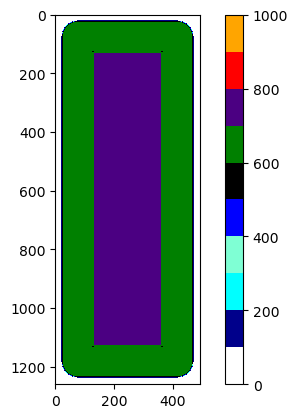

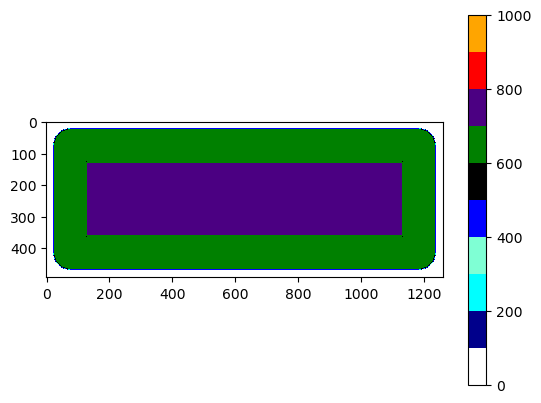

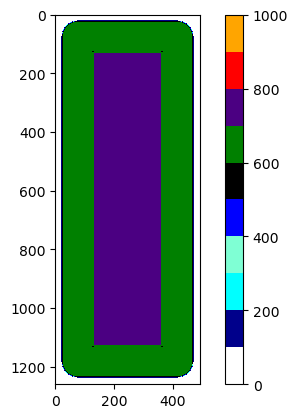

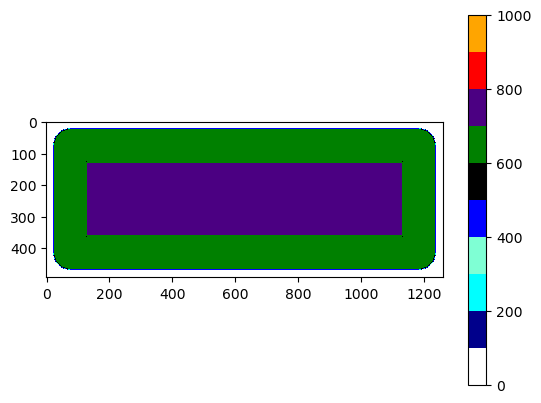

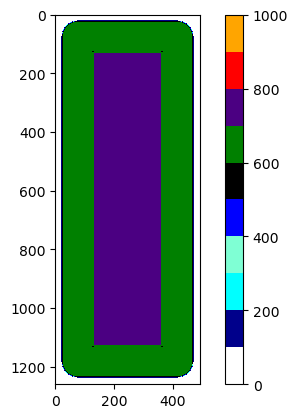

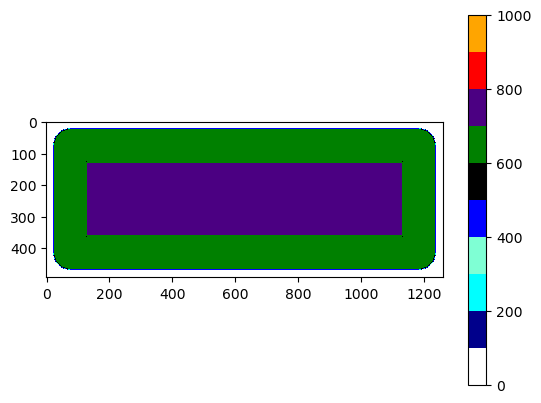

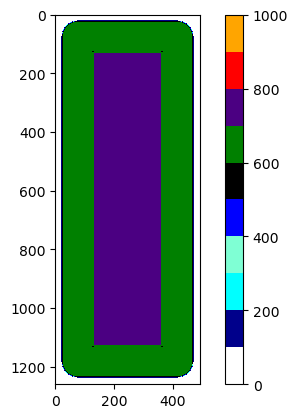

In [3]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [4]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.010573863983154297
Total de [Making offset routes] : 0.46857500076293945
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.009496927261352539
Total de [Making offset routes] : 0.44028377532958984
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.009910821914672852
Total de [Making offset routes] : 0.4412503242492676
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.009482145309448242
Total de [Making offset routes] : 0.4415707588195801
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.009816408157348633
Total de [Making offset routes] : 0.4224727153778076
Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.01101064682006836
Total de [Making offset routes] : 0.6092474460601807
Making offset routes
salvan

Rotas de pontes

In [5]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[sob_int_ext_per] = gui.ask_parameters_internal_routes()

with Timer(f"Making bridges routes"):
    for c in camadas:
        with Timer(f"Camada: {c.name}"):
            c.make_bridges_routes(folders, sob_int_ext_per)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes
Camada: L_000
Making Offset bridges routes
Total de [Making Offset bridges routes] : 0.00021314620971679688
Making Zigzag bridges routes
Total de [Making Zigzag bridges routes] : 0.1285252571105957
Total de [Camada: L_000] : 0.1794278621673584
Total de [Making bridges routes] : 0.17958641052246094


IndexError: list index out of range

Rotas de Ziguezague

In [33]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 0.026111602783203125
Total de [criando as rotas de zigzag, camada:L_000] : 0.09374618530273438
Total de [Making zigzag routes] : 0.1068873405456543


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

WEAVING

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.13988709449768066
salvando rotas
deletado: /L_000/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.021709918975830078
Total de [Fase 5 b] : 0.1619422435760498
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.12946414947509766
salvando rotas
deletado: /L_001/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.02137923240661621
Total de [Fase 5 b] : 0.15116238594055176
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.11189866065979004
salvando rotas
deletado: /L_002/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.020704030990600586
Total de [Fase 5 b] : 0.1328427791595459
Fase 5 b
gerando preenchimentos oscilatórios
Total de [gerando preenchimentos oscilatórios] : 0.11092042922973633
salvando rotas
deletado: /L_003/I_000/zigzags/macro_areas
Total de [salvando rotas] : 0.023488044738

Rotas de Thin Walls

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.011106252670288086
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.5762786865234375e-06
Total de [Making thin walls routes] : 0.011366128921508789
Total de [Fase 5] : 0.011481523513793945
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008688688278198242
salvando imagens das rotas
Total de [salvando imagens das rotas] : 4.76837158203125e-06
Total de [Making thin walls routes] : 0.008925914764404297
Total de [Fase 5] : 0.008934259414672852
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008632183074951172
salvando imagens das rotas
Total de [salvando imagens das rotas] : 3.5762786865234375e-06
Total de [Making thin walls routes] : 0.008797168731689453
Total de [Fase 5] : 0.008805036544799805
Fase 5
Making thin walls routes
criando rotas TW
Total de [criando rotas TW] : 0.008590459823608398
salvando imagens das rotas
Total

Encontrando o lugar onde será o começo da trilha de cada ilha

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.islands_path_starts(folders)

%reset_selective -f "camadas"                        

Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0015079975128173828
Total de [Encontrando ponto de união ext-int] : 0.14167094230651855
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0017435550689697266
Total de [Encontrando ponto de união ext-int] : 0.23111867904663086
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009510517120361328
Total de [Encontrando ponto de união ext-int] : 0.13734769821166992
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0012013912200927734
Total de [Encontrando ponto de união ext-int] : 0.23889636993408203
Encontrando ponto de união ext-int
SÓ TEM PONTES DE ZZ
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0009305477142333984
Total de

Unificando rotas EXTERNAS nas camadas

In [ ]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 6: layer_{c.name}"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6: layer_L_000
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.01006007194519043
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.01210784912109375
Total de [Conectando rotas externas] : 0.06658434867858887
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.026875972747802734
Total de [Fase 6: layer_L_000] : 0.09375834465026855
Fase 6: layer_L_001
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.015162467956542969
Conectando pontes de Crossover
Total de [Conectando pontes de Crossover] : 0.013290166854858398
Total de [Conectando rotas externas] : 0.0704500675201416
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02791142463684082
Total de [Fase 6: layer_L_001] : 0.09855461120605469
Fase 6: layer_L_002
Conectando rotas externas
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 0.08025574684143066
Conec

Unificando rotas INTERNAS nas camadas

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 7: Layer_{c.name}"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7: Layer_L_000
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0030488967895507812
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0003039836883544922
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.023627519607543945
Total de [Fase 7: Layer_L_000] : 0.0674591064453125
Fase 7: Layer_L_001
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.003513336181640625
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0003368854522705078
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02125859260559082
Total de [Fase 7: Layer_L_001] : 0.06708955764770508
Fase 7: Layer_L_002
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 0.0046384334564208984
Conectando pontes de zigzag
Total de [Conectando pontes de zigzag] : 0.0003273487091064453
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.021270036697387695
Total de [Fase 7: Layer_L_002] : 

Unindo rotas de thin walls

In [ ]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer(f"Fase 8: Layer_{c.name}"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8: Layer_L_000
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.00024771690368652344
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.02065253257751465
Total de [Fase 8: Layer_L_000] : 0.030980587005615234
Fase 8: Layer_L_001
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.000247955322265625
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.0192415714263916
Total de [Fase 8: Layer_L_001] : 0.028315305709838867
Fase 8: Layer_L_002
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0002741813659667969
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.018556594848632812
Total de [Fase 8: Layer_L_002] : 0.029355764389038086
Fase 8: Layer_L_003
Convertendo paredes finas
Total de [Convertendo paredes finas] : 0.0002551078796386719
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.018425941467285156
Total de [Fase 8: Layer_L_003] : 0.027254819869995117
Fase 8:

Unindo todas as rotas

In [24]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    c.close_final_path(folders)

%reset_selective -f "camadas"


Encontrando ponto de união ext-int
Total de [Encontrando ponto de união ext-int] : 0.08106350898742676
Value(False)
Conectando todas as partes
Total de [Conectando todas as partes] : 1.9486265182495117
salvando imagens das rotas
deletado: /L_000/I_000/island_route
[[93, 395], [93, 606], [92, 607], [59, 607], [58, 606], [58, 76], [59, 75], [59, 71], [60, 70], [60, 68], [62, 66], [62, 65], [65, 62], [66, 62], [68, 60], [70, 60], [71, 59], [75, 59], [76, 58], [239, 58], [240, 59], [244, 59], [245, 60], [247, 60], [249, 62], [250, 62], [253, 65], [253, 66], [255, 68], [255, 70], [256, 71], [256, 75], [257, 76], [257, 1184], [256, 1185], [256, 1189], [255, 1190], [255, 1192], [253, 1194], [253, 1195], [250, 1198], [249, 1198], [247, 1200], [245, 1200], [244, 1201], [240, 1201], [239, 1202], [76, 1202], [75, 1201], [71, 1201], [70, 1200], [68, 1200], [66, 1198], [65, 1198], [62, 1195], [62, 1194], [60, 1192], [60, 1190], [59, 1189], [59, 1185], [58, 1184], [58, 655], [59, 654], [92, 654], [9

KeyboardInterrupt: 

Gerando o Código G

In [ ]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_vazio, p_entre_int_ext, p_entre_camadas, substratoy, substratox, cortey, cortex] = gui.ask_parameters_Gcode()
coords_substrato = [substratoy, substratox]
coords_corte = [cortey, cortex]
camadas = folders.load_layers_hdf5()
configuracoes = files.Config("solda_config.yaml")

#layer_heights = [10+2.9+3+(i*1.5) for i,x in enumerate(camadas)]
layer_heights = [40+8+2.5+(i*2) for i,x in enumerate(camadas)]
with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               configuracoes,
                               vel_vazio,
                               p_entre_int_ext,
                               p_entre_camadas,
                               layer_heights,
                               coords_substrato,
                               coords_corte,
                               )
%reset_selective -f "camadas"

Cuspindo o Gcode
Deslocamento total da camada 0 = 545.6161425848107mm
Tempo estimado com Vel=360.0mm/min = 1.5156003960689188min

Deslocamento total da camada 1 = 580.975676325126mm
Tempo estimado com Vel=360.0mm/min = 1.61382132312535min

Deslocamento total da camada 2 = 545.616142584811mm
Tempo estimado com Vel=360.0mm/min = 1.5156003960689193min

Deslocamento total da camada 3 = 580.9756763251262mm
Tempo estimado com Vel=360.0mm/min = 1.6138213231253504min

Deslocamento total da camada 4 = 582.6117421839726mm
Tempo estimado com Vel=360.0mm/min = 1.618365950511035min

Deslocamento total da camada 5 = 541.8432958102059mm
Tempo estimado com Vel=360.0mm/min = 1.5051202661394607min

Deslocamento total da camada 6 = 582.6117421839724mm
Tempo estimado com Vel=360.0mm/min = 1.6183659505110344min

Deslocamento total da camada 7 = 580.975676325126mm
Tempo estimado com Vel=360.0mm/min = 1.61382132312535min

Total de [Cuspindo o Gcode] : 0.5249090194702148


Comprimento da trajetória

In [18]:
import os
import numpy as np
import math

with open("traj interna.txt") as f:
    lido = f.readlines()
    f.close()
lido = [x.strip("\n") for x in lido] 
lido = [x.split(", ") for x in lido] 
lido = lido[:-1]
lido = [[float(x[0]), float(x[1])] for x in lido]
modulos = [math.sqrt((x[0]**2)+(x[1]**2)) for x in lido]
comprimento = np.sum(modulos)
print(f'comprimento da trajetoria={comprimento}')

area_preench = 11 #mm² do imageJ
raio_toroide = 37.5 # mm medido
comp_traj = comprimento #mm do codigo G calculado acima
diam_fio = 1.2 #mm medido
area_fio = math.pi*((diam_fio/2)**2) #mm²
vol_preench = (2*math.pi*raio_toroide*area_preench)
Ws_Vd = vol_preench/(area_fio*comp_traj)
print(f'Relação de velocidades:{Ws_Vd}')

comprimento da trajetoria=405.95021132343504
Relação de velocidades:5.645191461277042


In [19]:
# import numpy as np
# camadas = folders.load_layers_hdf5()
# for c in camadas:
#     folders.load_islands_hdf5(c)
#     for isl in c.islands:
#         folders.load_island_paths_hdf5(c.name, isl)
#         internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
#         print(internal_trees)
# print([235,807] in internal_trees)

In [20]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [21]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)

In [22]:
# class TrafficLightState:
#     """Base class for traffic light states."""
#     def change(self, traffic_light):
#         raise NotImplementedError("This method should be overridden by subclasses")


# class RedState(TrafficLightState):
#     """State representing the red light."""
#     def change(self, traffic_light):
#         print("Changing from Red to Green")
#         traffic_light.state = GreenState()


# class YellowState(TrafficLightState):
#     """State representing the yellow light."""
#     def change(self, traffic_light):
#         print("Changing from Yellow to Red")
#         traffic_light.state = RedState()


# class GreenState(TrafficLightState):
#     """State representing the green light."""
#     def change(self, traffic_light):
#         print("Changing from Green to Yellow")
#         traffic_light.state = YellowState()


# class TrafficLight:
#     """Traffic light class that uses a state machine."""
#     def __init__(self):
#         self.state = RedState()  # Initial state

#     def change(self):
#         """Change the state of the traffic light."""
#         self.state.change(self)

#     def __str__(self):
#         return f"Current state: {self.state.__class__.__name__}"


# # Example usage
# if __name__ == "__main__":
#     traffic_light = TrafficLight()
    
#     # Simulate the traffic light changing states
#     for _ in range(6):  # Change state 6 times
#         print(traffic_light)
#         traffic_light.change()

In [23]:
# import numpy as np
# import cv2  # Assuming you are using OpenCV for image processing

# def bobobo(image1, image2):
#     """A placeholder function that performs some operation on two images."""
#     # For demonstration, let's just return the absolute difference between the two images
#     return cv2.absdiff(image1, image2)

# def process_images(image_list):
#     """Process a list of images, comparing the last two with the current image."""
#     for i in range(len(image_list)):
#         current_image = image_list[i]
        
#         # Check if there are at least two previous images to compare
#         if i >= 2:
#             last_image = image_list[i - 1]
#             second_last_image = image_list[i - 2]
            
#             # Apply the bobobo function to the current image and the last two images
#             result_last = bobobo(current_image, last_image)
#             result_second_last = bobobo(current_image, second_last_image)
            
#             # Here you can do something with the results, like saving or displaying them
#             # For demonstration, we'll just print the shapes of the results
#             print(f"Comparing image {i} with last image {i-1}: result shape = {result_last.shape}")
#             print(f"Comparing image {i} with second last image {i-2}: result shape = {result_second_last.shape}")

# # Example usage
# if __name__ == "__main__":
#     # Create a list of dummy images (for demonstration purposes)
#     # In practice, you would load your images using cv2.imread or similar
#     image_list = [np.random.randint(0, 256, (100, 100, 3), dtype=np.uint8) for _ in range(5)]
    
#     process_images(image_list)